**MOVIE RECOMMENDATION SYSTEM**


*   BY BHHAANU PIRANGE, HARIKA BATTU, TEJESHWAR INDURI




In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# referenced from https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhhaanupirange","key":"7f6cc1e68fbbd3df55960bbfad70d1cf"}'}

In [3]:
!rmdir kaggle

rmdir: failed to remove 'kaggle': No such file or directory


In [4]:
!mkdir -p ~/.kaggle


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json 

In [7]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

 79% 7.00M/8.89M [00:00<00:00, 13.4MB/s]
100% 8.89M/8.89M [00:00<00:00, 11.3MB/s]


In [8]:
!ls

kaggle.json  sample_data  tmdb-movie-metadata.zip


In [9]:

!unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [10]:
!ls

kaggle.json  tmdb_5000_credits.csv  tmdb-movie-metadata.zip
sample_data  tmdb_5000_movies.csv


In [11]:
import pandas as pd
import numpy as np

In [12]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [13]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [14]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [15]:
df2 = pd.merge( df1, df2)
df2

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4805,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5

In [16]:
del df2["id"]

In [17]:
df2=df2.drop(['spoken_languages','runtime','revenue','production_countries','production_companies','original_language','budget','overview','status','spoken_languages','original_title','homepage','tagline','popularity','release_date','movie_id'],axis=1)

In [18]:
df2

,title,cast,crew,genres,keywords,vote_average,vote_count
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.9,4500
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.3,4466
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.6,9106
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.1,2124
...,...,...,...,...,...,...,...
4804,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",6.6,238
4805,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],5.9,5
4806,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",7.0,6
4807,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",[],[],5.7,7


DEMOGRAPHIC FILTERING

In [19]:
# C= the mean vote for all the data
C = df2['vote_average'].mean()
print(C)

6.092514036182159


In [20]:
#m =minimum number of votes necessary to be considered for recommendation
m = df2['vote_count'].quantile(0.8)
print(m)

958.4000000000001


In [21]:
eligible_movies = df2.copy().loc[df2['vote_count'] >= m]
len(eligible_movies)

962

In [22]:
def rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

eligible_movies['score'] = eligible_movies.apply(rating, axis=1)
eligible_movies

,title,cast,crew,genres,keywords,vote_average,vote_count,score
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800,7.116807
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.9,4500,6.758220
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.3,4466,6.263341
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.6,9106,7.456447
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.1,2124,6.097672
...,...,...,...,...,...,...,...,...
4583,Paranormal Activity,"[{""cast_id"": 3, ""character"": ""Katie"", ""credit_...","[{""credit_id"": ""52fe4477c3a368484e024b01"", ""de...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",5.9,1316,5.981123
4585,Monty Python and the Holy Grail,"[{""cast_id"": 11, ""character"": ""King Arthur / V...","[{""credit_id"": ""52fe4272c3a36847f801f66f"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...","[{""id"": 113, ""name"": ""holy grail""}, {""id"": 345...",7.8,1708,7.186268
4608,12 Angry Men,"[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...","[{""credit_id"": ""52fe423dc3a36847f800ec55"", ""de...","[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 934, ""name"": ""judge""}, {""id"": 1417, ""n...",8.2,2078,7.534800
4645,Cube,"[{""cast_id"": 5, ""character"": ""Leaven"", ""credit...","[{""credit_id"": ""52fe4243c3a36847f80107bf"", ""de...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...","[{""id"": 483, ""name"": ""riddle""}, {""id"": 1646, ""...",6.9,1069,6.518282


In [23]:
eligible_movies=eligible_movies.sort_values(by=['score'],ascending=False)
eligible_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1887,The Shawshank Redemption,8205,8.5,8.248201
662,Fight Club,9413,8.3,8.096011
3342,The Godfather,5893,8.4,8.077220
3237,Pulp Fiction,8428,8.3,8.074604
65,The Dark Knight,12002,8.2,8.044155
809,Forrest Gump,7927,8.2,7.972682
96,Inception,13752,8.1,7.969210
95,Interstellar,10867,8.1,7.937302
1996,The Empire Strikes Back,5879,8.2,7.904593
1824,Schindler's List,4329,8.3,7.899869


In [24]:
import plotly.express as px
fig = px.bar((eligible_movies.head(10).sort_values('score', ascending=True)), x="score", y="title", orientation='h')
fig.show()

Content Based Filtering

In [25]:
df2[['title', 'cast', 'crew', 'keywords', 'genres']].head(3)

,title,cast,crew,keywords,genres
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [26]:
df2['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
df2['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [28]:
df2['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [29]:
df2['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [30]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [31]:
def name_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    return []
#can consider crew too
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(name_list)

In [32]:
def extract_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df2['director'] = df2['crew'].apply(extract_director)

In [33]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]"


In [34]:
def cleaning(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(cleaning)

In [35]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver, ...",jamescameron,"[cultureclash, future, spacewar, spacecolony, ...","[action, adventure, fantasy, sciencefiction]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley, ste...",goreverbinski,"[ocean, drugabuse, exoticisland, eastindiatrad...","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux, ralp...",sammendes,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[action, adventure, crime]"


In [36]:
def generate_string(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['text'] = df2.apply(generate_string, axis=1)

In [37]:
df2['text'][0]

'cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathanmeister gerryblair matthewchamberlain paulyates wraywilson jamesgaylyn melvinlenoclarkiii carvonfutrell brandonjelkes micahmoch hanniyahmuhammad christophernolen christaoliver aprilmariethomas bravitaa.threatt colinbl

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(df2['text'])

In [39]:
count_mat=count_matrix.toarray()
count_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
count.inverse_transform(count_mat[0].reshape(1,-1))

[array(['3d', 'action', 'adventure', 'aliciavela', 'alien', 'alienplanet',
        'allanhenry', 'anthonyingruber', 'antiwar', 'aprilmariethomas',
        'ashleyjeffery', 'austinwilson', 'bailey', 'battle',
        'brandonjelkes', 'bravitaa', 'carvonfutrell', 'cchpounder', 'cgi',
        'chrismala', 'christaoliver', 'christophernolen', 'colinbleasdale',
        'cullenb', 'cultureclash', 'davidvanhorn', 'deanknowsley',
        'debrawilson', 'dileeprao', 'fantasy', 'frankietorres', 'future',
        'futuristic', 'garethruck', 'gerryblair', 'giovanniribisi',
        'hanniyahmuhammad', 'hunt', 'ilramchoi', 'jacobtomuri',
        'jahnelcurfman', 'jamescameron', 'jamesgaylyn', 'jamespatrickpitt',
        'jamieharrison', 'jasonwhyte', 'jodielandau', 'jodietaylor',
        'joeldavidmoore', 'joncurry', 'josephbradymadden', 'josephmika',
        'julenerenee', 'julielamm', 'kaipantano', 'kellykilgour',
        'kelsonhenderson', 'kevindorman', 'kylawarren', 'lazalonso',
        'lisaro

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim= cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.0358185 , 0.01913459, ..., 0.02197935, 0.        ,
        0.        ],
       [0.0358185 , 1.        , 0.03940892, ..., 0.        , 0.        ,
        0.        ],
       [0.01913459, 0.03940892, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02197935, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
df_cosine=pd.DataFrame(cosine_similarity(count_matrix,dense_output=True)).head()
df_cosine

,0,1,2,3,4,5,6,7,8,9,...,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808
0,1.000000,0.035819,0.019135,0.006765,0.081612,0.020968,0.000000,0.039101,0.023686,0.020910,...,0.000000,0.000000,0.000000,0.015992,0.000000,0.022617,0.029488,0.021979,0.0,0.0
1,0.035819,1.000000,0.039409,0.018578,0.037352,0.047984,0.000000,0.040266,0.032521,0.028710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.031054,0.000000,0.000000,0.0,0.0
2,0.019135,0.039409,1.000000,0.014886,0.044896,0.023070,0.000000,0.032266,0.013030,0.015337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.049767,0.000000,0.000000,0.0,0.0
3,0.006765,0.018578,0.014886,1.000000,0.010582,0.027188,0.000000,0.015210,0.000000,0.032535,...,0.009445,0.022942,0.015127,0.024884,0.041885,0.052786,0.000000,0.017100,0.0,0.0
4,0.081612,0.037352,0.044896,0.010582,1.000000,0.043732,0.024311,0.061163,0.018525,0.021805,...,0.000000,0.000000,0.000000,0.025016,0.000000,0.035377,0.000000,0.000000,0.0,0.0


In [43]:
df_cosine=pd.DataFrame(cosine_similarity(count_matrix[1:10],dense_output=True))
df_cosine

,0,1,2,3,4,5,6,7,8
0,1.000000,0.039409,0.018578,0.037352,0.047984,0.000000,0.040266,0.032521,0.028710
1,0.039409,1.000000,0.014886,0.044896,0.023070,0.000000,0.032266,0.013030,0.015337
2,0.018578,0.014886,1.000000,0.010582,0.027188,0.000000,0.015210,0.000000,0.032535
3,0.037352,0.044896,0.010582,1.000000,0.043732,0.024311,0.061163,0.018525,0.021805
4,0.047984,0.023070,0.027188,0.043732,1.000000,0.000000,0.047143,0.019038,0.039216
5,0.000000,0.000000,0.000000,0.024311,0.000000,1.000000,0.017471,0.042333,0.000000
6,0.040266,0.032266,0.015210,0.061163,0.047143,0.017471,1.000000,0.013313,0.031341
7,0.032521,0.013030,0.000000,0.018525,0.019038,0.042333,0.013313,1.000000,0.018985
8,0.028710,0.015337,0.032535,0.021805,0.039216,0.000000,0.031341,0.018985,1.000000


In [44]:
indices = pd.Series(df2.index, index=df2['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [48]:
def recommend(title, cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores]
    del movie_indices[0]
    return df2['title'].iloc[movie_indices]

In [49]:
recommend('Newlyweds', cosine_sim).head(900)

4755                  The Brothers McMullen
3844                          She's the One
3812                         Purple Violets
4254                  Me You and Five Bucks
1261              Life or Something Like It
                       ...                 
1613                           Midnight Run
1622    What's the Worst That Could Happen?
1739                      The Spy Next Door
1938                                 Sheena
1946                                Carnage
Name: title, Length: 900, dtype: object

In [50]:
def create_data(title, cosine_sim):
  idx = indices[title]
  s_scores = list(enumerate(cosine_sim[idx]))
  s_scores = sorted(s_scores, key=lambda x: x[1], reverse=True)
  movie_i=[i[0] for i in s_scores]
  del movie_i[0]
  movie_s=[i[1] for i in s_scores]  
  del movie_s[1]
  s_movies=df2['title'].iloc[movie_i]
  data = pd.DataFrame(list(zip(movie_i,s_movies,movie_s)),columns =['Index', 'title','SimScore'])
  return data

In [52]:
newdata=create_data('Newlyweds', cosine_sim)
newdata
new=eligible_movies[['score','title']]

In [53]:
newdata=newdata.merge(new,on='title')


In [54]:
newdata

,Index,title,SimScore,score
0,395,The Holiday,0.207950,6.433345
1,1566,27 Dresses,0.175412,6.096295
2,1701,Aladdin,0.136931,7.113539
3,815,Hitch,0.129099,6.287667
4,817,American Wedding,0.129099,6.042477
...,...,...,...,...
969,4502,The Blair Witch Project,0.000000,6.201234
970,4583,Paranormal Activity,0.000000,5.981123
971,4608,12 Angry Men,0.000000,7.534800
972,4645,Cube,0.000000,6.518282


In [55]:
fig = px.scatter(newdata, x="score", y="SimScore")
fig.show()

In [56]:
newdata[['Index','SimScore','title']]

,Index,SimScore,title
0,395,0.207950,The Holiday
1,1566,0.175412,27 Dresses
2,1701,0.136931,Aladdin
3,815,0.129099,Hitch
4,817,0.129099,American Wedding
...,...,...,...
969,4502,0.000000,The Blair Witch Project
970,4583,0.000000,Paranormal Activity
971,4608,0.000000,12 Angry Men
972,4645,0.000000,Cube


In [57]:
## K-Means

In [58]:
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans

X = newdata[['SimScore','score']].values

print(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[[0.2079501  6.43334499]
 [0.1754116  6.0962949 ]
 [0.13693064 7.1135391 ]
 ...
 [0.         7.53479958]
 [0.         6.51828226]
 [0.         6.37600877]]
[294.27172609500656, 99.66889151284862, 52.29608534641645, 31.528699071643373, 22.75536773216829, 15.748633287399539, 12.606891934567471, 10.124658376255926, 8.125563329185137, 6.87896223914027]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



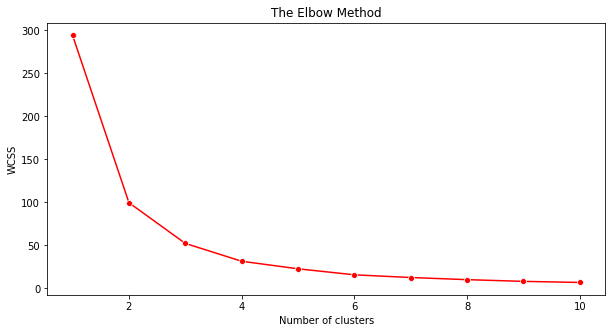

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

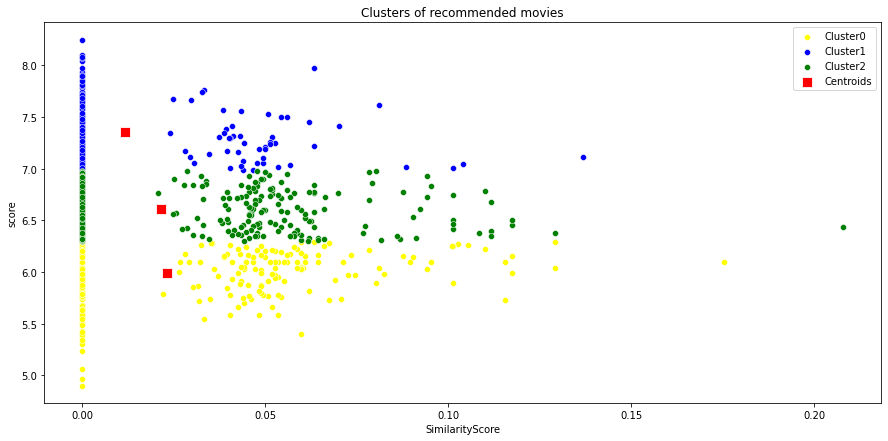

In [61]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster0')
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster1')
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster2')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters of recommended movies')
plt.xlabel('SimilarityScore')
plt.ylabel('score')
plt.legend()
plt.show()

In [62]:
y_val=pd.DataFrame (y_kmeans, columns = ['Cluster'])
y_val=y_val.reset_index()
n=newdata.reset_index()
n=n.rename(columns={"index": "sno"})
y_val= y_val.rename(columns={"index":"sno"})
n=n.merge(y_val)
n

,sno,Index,title,SimScore,score,Cluster
0,0,395,The Holiday,0.207950,6.433345,2
1,1,1566,27 Dresses,0.175412,6.096295,0
2,2,1701,Aladdin,0.136931,7.113539,1
3,3,815,Hitch,0.129099,6.287667,0
4,4,817,American Wedding,0.129099,6.042477,0
...,...,...,...,...,...,...
969,969,4502,The Blair Witch Project,0.000000,6.201234,0
970,970,4583,Paranormal Activity,0.000000,5.981123,0
971,971,4608,12 Angry Men,0.000000,7.534800,1
972,972,4645,Cube,0.000000,6.518282,2


In [63]:
del n['sno']

In [64]:
n= n.drop_duplicates(subset=["title"],keep='first')
n

,Index,title,SimScore,score,Cluster
0,395,The Holiday,0.207950,6.433345,2
1,1566,27 Dresses,0.175412,6.096295,0
2,1701,Aladdin,0.136931,7.113539,1
3,815,Hitch,0.129099,6.287667,0
4,817,American Wedding,0.129099,6.042477,0
...,...,...,...,...,...
969,4502,The Blair Witch Project,0.000000,6.201234,0
970,4583,Paranormal Activity,0.000000,5.981123,0
971,4608,12 Angry Men,0.000000,7.534800,1
972,4645,Cube,0.000000,6.518282,2


In [65]:
n["title"].loc[n['Cluster'] == 0]

1                   27 Dresses
3                        Hitch
4             American Wedding
6              The Other Woman
7             How to Be Single
                ...           
947                  The Witch
953                  The Purge
965                 Unfriended
969    The Blair Witch Project
970        Paranormal Activity
Name: title, Length: 324, dtype: object

In [66]:
n["title"].loc[n['Cluster'] == 1]

2                             Aladdin
19                   Moonrise Kingdom
26                 The Princess Bride
39                      Groundhog Day
47                Saving Private Ryan
                    ...              
961                    Reservoir Dogs
962    The Good, the Bad and the Ugly
964                             Rocky
966                       Taxi Driver
971                      12 Angry Men
Name: title, Length: 215, dtype: object

In [71]:
print(n["title"].loc[n['Cluster'] == 1])

2                             Aladdin
19                   Moonrise Kingdom
26                 The Princess Bride
39                      Groundhog Day
47                Saving Private Ryan
                    ...              
961                    Reservoir Dogs
962    The Good, the Bad and the Ugly
964                             Rocky
966                       Taxi Driver
971                      12 Angry Men
Name: title, Length: 215, dtype: object


In [72]:
print(n["title"].loc[n['Cluster'] == 0])

1                   27 Dresses
3                        Hitch
4             American Wedding
6              The Other Woman
7             How to Be Single
                ...           
947                  The Witch
953                  The Purge
965                 Unfriended
969    The Blair Witch Project
970        Paranormal Activity
Name: title, Length: 324, dtype: object


In [73]:
print(n["title"].loc[n['Cluster'] == 2])

0                The Holiday
5      Friends with Benefits
8                   The Mask
9                   The DUFF
12                 Enchanted
               ...          
963                 The Raid
967                I Origins
968                    Bambi
972                     Cube
973                  Mad Max
Name: title, Length: 421, dtype: object


In [74]:
print(n["title"].loc[n['Cluster'] == 1].max())

X-Men: Days of Future Past


In [67]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 2, 3, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0,
       2, 3, 0, 0, 3, 0, 0, 2, 3, 2, 3, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0,
       2, 0, 2, 1, 2, 3, 3, 3, 0, 3, 0, 0, 2, 0, 2, 2, 2, 1, 3, 2, 2, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 3, 1, 3, 0, 0, 3, 0, 1, 0, 2, 0, 0, 3, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 3, 2, 0, 0, 3,
       2, 2, 0, 0, 0, 2, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 2, 3,
       3, 3, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 3, 2, 3, 0, 1, 3, 2, 3, 0, 3,
       1, 1, 3, 2, 2, 1, 0, 0, 3, 1, 0, 1, 3, 0, 2, 0, 3, 3, 2, 2, 0, 3,
       0, 0, 2, 2, 2, 3, 2, 2, 0, 0, 1, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 3, 3,
       0, 2, 0, 3, 0, 2, 0, 3, 3, 1, 2, 2, 0, 0, 3, 2, 3, 3, 0, 3, 2, 2,
       1, 3, 0, 0, 2, 1, 0, 3, 2, 0, 2, 3, 0, 1, 2, 2, 0, 1, 2, 2, 0, 3,
       1, 1, 3, 0, 0, 0, 2, 3, 0, 3, 0, 1, 3, 1, 0,

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

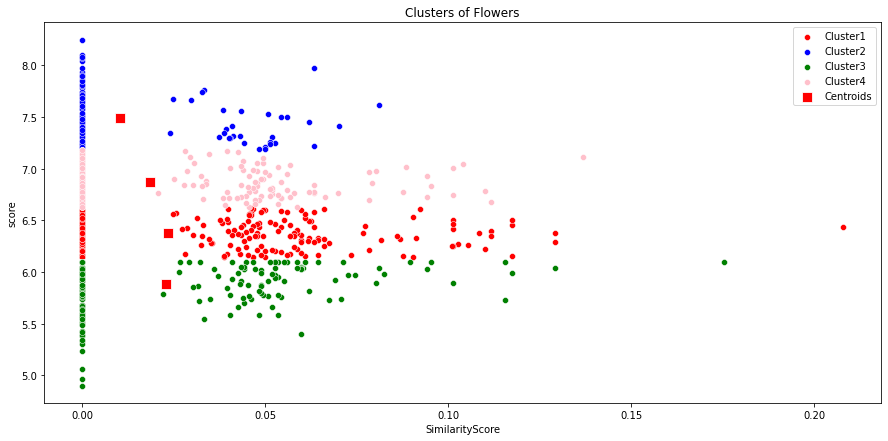

In [68]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'red', label = 'Cluster1')
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster2')
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster3')
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'pink', label = 'Cluster4')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters of Flowers')
plt.xlabel('SimilarityScore')
plt.ylabel('score')
plt.legend()
plt.show()